<a href="https://colab.research.google.com/github/SherwynM/Bike-Rental-Prediction/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("bike_rental.xlsx")

In [3]:
data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


<h1><b>EXPLORATORY DATA ANALYSIS<b><h1>

In [4]:
data.shape # 731 Observation Values and 16 columns

(731, 16)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

<b>Here, 'season', 'yr', 'mnth', 'holiday', 'weekday',
    'workingday' and 'weathersit' predictors should be categorical type,
    but they are of type int64.
    </b>

In [6]:
#Converting values to their correct data type
data['season']=data['season'].astype('category')
data['yr']=data['yr'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['holiday']=data['holiday'].astype('category')
data['weekday']=data['weekday'].astype('category')
data['workingday']=data['workingday'].astype('category')
data['weathersit']=data['weathersit'].astype('category')
print(data.dtypes)

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [7]:
data.drop(columns=['instant','dteday']).describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**<u>temp</u>**: The mean is around 0.495 (Please Note the values are normalized) with a standard deviation of 1.83 indicating moderate variablity around the mean.

**<u>hum</u>**: The mean is around 0.62 with a standard deviation of 0.14 indicating moderate variability in humidity levels.

**<u>windspeed</u>**: The mean is around 0.19 having a standard deviation of 0.077 suggesting relativey consistent windspeed values across the dataset.

In [8]:
#printing the unique values
print("============Unique Values============\n")

print("Seasons:",data['season'].nunique())
print("Year:",data['yr'].nunique())
print("Month:",data['mnth'].nunique())
print("Holidays:",data['holiday'].nunique())
print("Weekdays:",data['weekday'].nunique())
print("Working Days:",data['workingday'].nunique())
print("Weather Situation:",data['weathersit'].nunique())

============Unique Values============

Seasons: 4
Year: 2
Month: 12
Holidays: 2
Weekdays: 7
Working Days: 2
Weather Situation: 3


**Seasons**: 1: Spring, 2: Summer, 3: Autumn, 4: Winter<br>
**Year**   : 0: 2020   ,   1: 2021<br>
**Holidays**:0: No  ,    1: Yes<br>
**Weekdays**:       0-6<br>
**Working Day**s: 0: No ,  1:Yes<br>
**Weather Situation**: 1: Clear, 2: Cloudy, 3: Light Rain/Snow, 4: Heavy Rain/Snow

In [9]:
data.drop(columns=['instant','dteday','casual','registered'],inplace=True)

# 'instant' is just an index value and therefore it is dropped
# 'dteday' is dropped because we are not workking on temporal analysis'
# registered and casual both are dropped because both add columns up to give another column 'cnt'

In [10]:
data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349


In [11]:
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<h3><u><b>Correlation Analysis

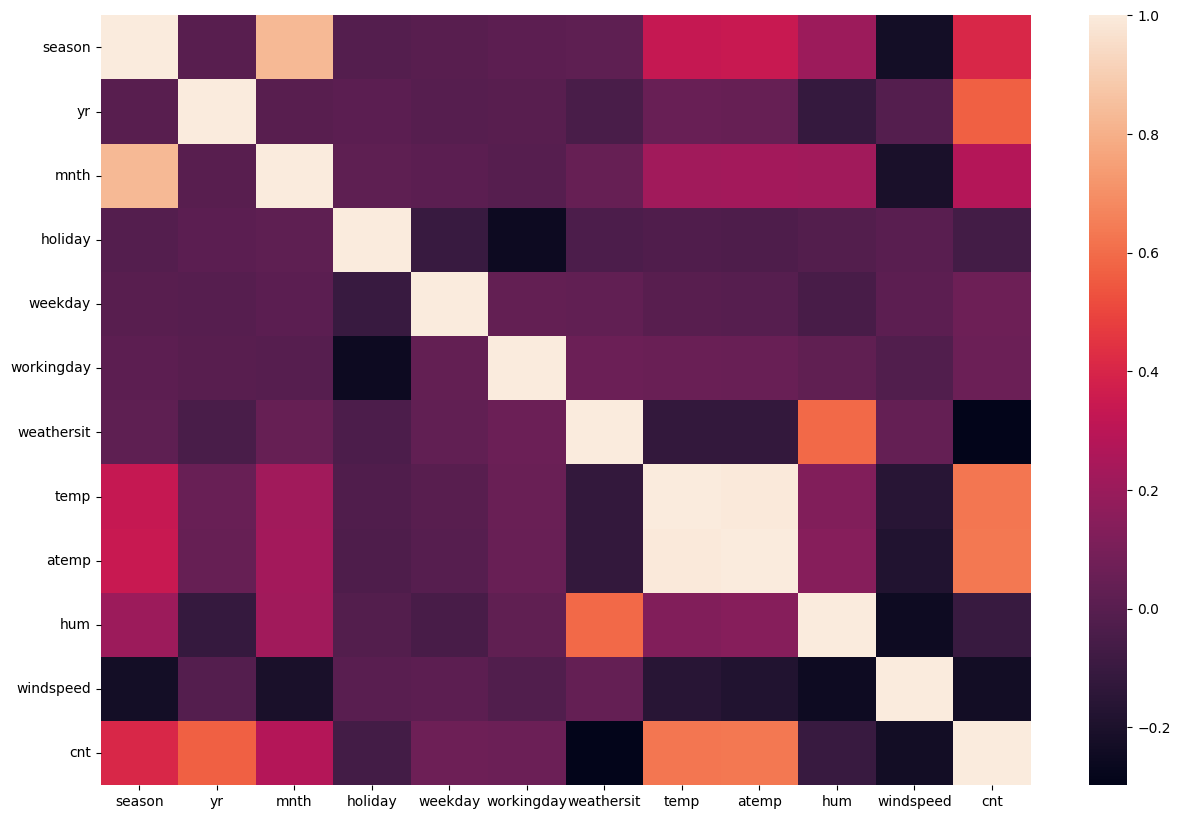

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr())
plt.show()

In [13]:
data.drop(columns=["atemp","mnth"],inplace=True) #atemp and temp are correlated

In [14]:

numeric_var = ['temp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

**<u><h2>OUTLIERS ANALYSIS**

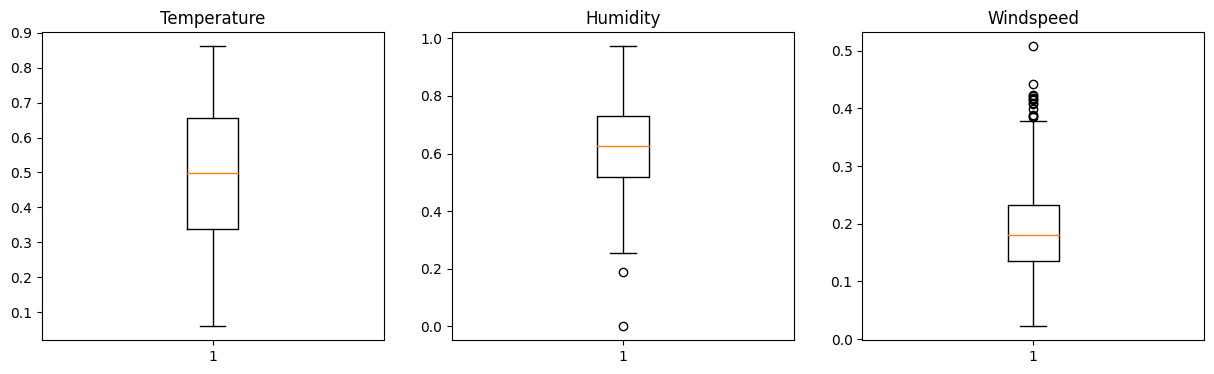

In [15]:
fig,axs=plt.subplots(1,3,figsize=(15,4))
axs[0].boxplot(data["temp"])
axs[0].set_title('Temperature')

axs[1].boxplot(data["hum"])
axs[1].set_title('Humidity')

axs[2].boxplot(data["windspeed"])
axs[2].set_title('Windspeed')

plt.show()

In [16]:
numeric_values=["temp","hum",]# no null in temp by iqr method
outlier_count=0
for i in numeric_values:
  print("\033[1m{}\033[0m".format(i))
  q75,q25=np.percentile(data.loc[:,i],[75,25])
  iqr=q75-q25 # Range where one can find the middle 50%
  Innerfence=q25-(iqr*1.5) # Lower Boundary for potential outliers
  Upperfence=q75+(iqr*1.5) # Higher Boundary for potential outlier
  print("Innerfence ="+str(Innerfence))
  print("Upperfence ="+str(Upperfence))
  print("IQR ="+str(iqr))
  data.loc[data[i]<Innerfence,i]=np.nan #If data pt is lower than Innerfence fill it with null values
  data.loc[data[i]>Upperfence,i]=np.nan #If data pt is higher than Upperfence fill it with null values
print("=============")
print(data[numeric_values].isnull().sum())

temp
Innerfence =-0.14041600000000015
Upperfence =1.1329160000000003
IQR =0.3183330000000001
hum
Innerfence =0.20468725
Upperfence =1.0455212500000002
IQR =0.21020850000000002
temp    0
hum     2
dtype: int64


In [17]:
data['hum']=data['hum'].fillna(data['hum'].median())
data[['temp','hum']].isnull().sum()

temp    0
hum     0
dtype: int64

In [18]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

sc=["windspeed"]
data_subset=data[sc]
# A higher contanimation value will result in outliers being detected but take care
detector=IsolationForest(contamination=0.015) #this is expected to identify 1.5% pts as outliers
detector.fit(data[["windspeed"]]) # learn characteristics of normal data pts and identify outliers
isolation_outliers=detector.predict(data[["windspeed"]]) # predict whether each data pt is an outlier or not
indices=np.where(isolation_outliers==-1)[0]# -1 for outliers 1 for inliers
#print("The Indices of the Outliers are:",indices)
data.loc[indices,"windspeed"]=np.nan # set all these outliers to NaN

data[['windspeed']].isnull().sum()

windspeed    11
dtype: int64

In [19]:
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())
data[['windspeed']].isnull().sum()

windspeed    0
dtype: int64

In [20]:
data.rename(columns={
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'holiday': 'Holiday',
    'weekday': 'Day Of Week',
    'workingday': 'Working Day',
    'weathersit': 'Weather Condition',
    'temp': 'Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'cnt': 'Total Rentals'
},inplace=True)

In [21]:
data.head()

,Season,Year,Holiday,Day Of Week,Working Day,Weather Condition,Temperature,Humidity,Wind Speed,Total Rentals
0,1,0,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,0,3,1,1,0.226957,0.436957,0.186900,1600


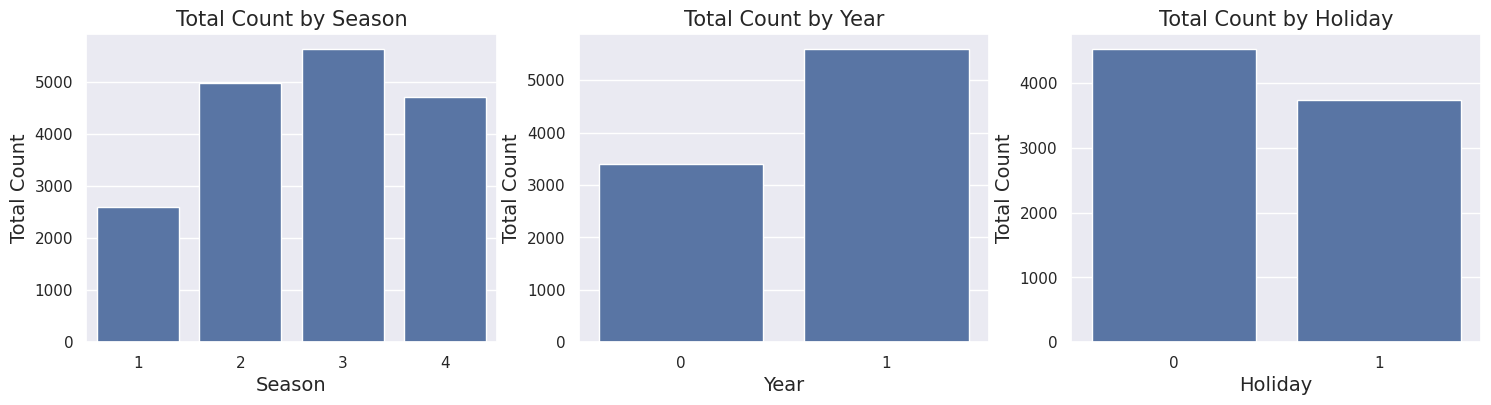

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [22]:
categorical_variables_plt=["Season","Year","Holiday"]

sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
axes = axes.flatten()
for i,var in enumerate(categorical_variables_plt):
  plt.figure(figsize=(3,3))
  sns.barplot(x=var,y="Total Rentals",data=data,ax=axes[i],ci=None)
  axes[i].set_title(f"Total Count by {var}",fontsize=15)
  axes[i].set_xlabel(var,fontsize=14)
  axes[i].set_ylabel("Total Count",fontsize=14)

plt.tight_layout()
plt.show()

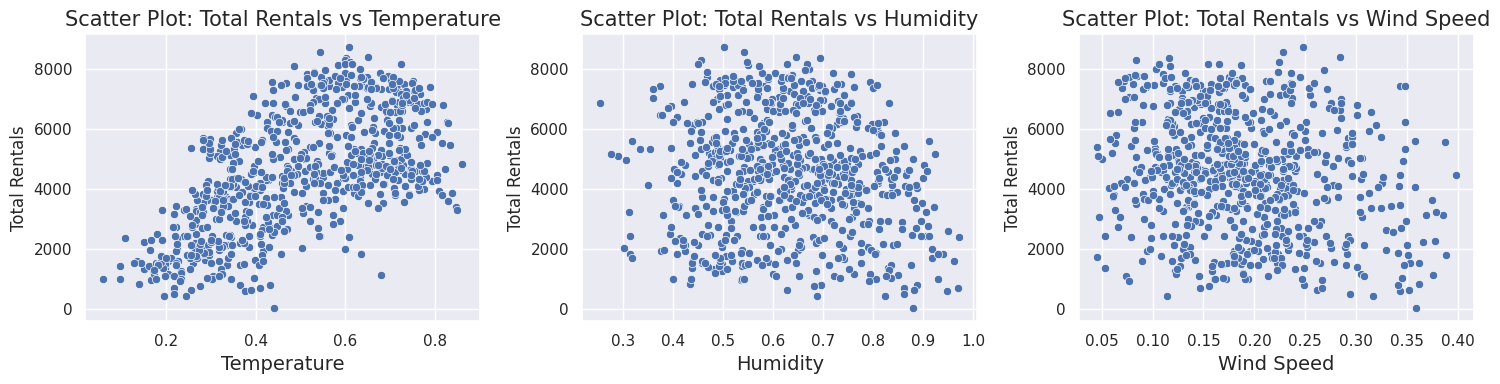

In [23]:
a=["Temperature","Humidity","Wind Speed"]

fig,axes=plt.subplots(1,3,figsize=(15,4))
axes=axes.flatten()
for i,var in enumerate(a):
  sns.scatterplot(x=var,y="Total Rentals",data=data,ax=axes[i])
  axes[i].set_title(f"Scatter Plot: Total Rentals vs {var}",fontsize=15)
  axes[i].set_xlabel(var,fontsize=14)
  axes[i].set_ylabel("Total Rentals")
plt.tight_layout()
plt.show()

In [24]:
temperature_corr_coef=data['Temperature'].corr(data['Total Rentals'])
humidity_corr_coef=data['Humidity'].corr(data['Total Rentals'])
wind_speed_corr_coef=data['Wind Speed'].corr(data['Total Rentals'])

print("The Correlation Coefficient between Temperature and Total Rentals: ",temperature_corr_coef)
print("The Correlation Coefficient between Humidity and Total Rentals: ",humidity_corr_coef)
print("The Correlation Coefficient between Wind Speed and Total Rentals: ",wind_speed_corr_coef)

The Correlation Coefficient between Temperature and Total Rentals:  0.6274940090334918
The Correlation Coefficient between Humidity and Total Rentals:  -0.12145420087666665
The Correlation Coefficient between Wind Speed and Total Rentals:  -0.21677570406217514


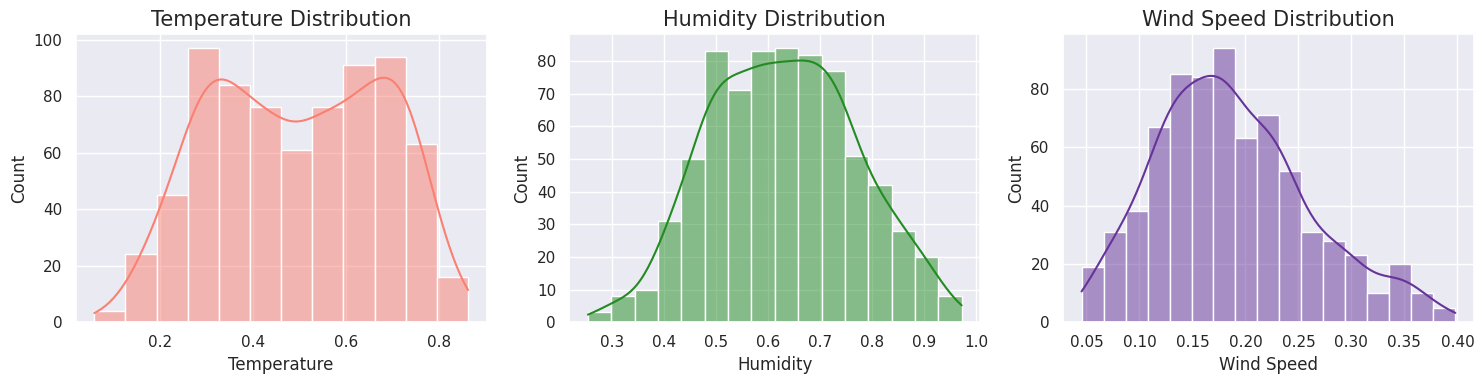

In [25]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
sns.histplot(data['Temperature'],kde=True,ax=axes[0],color='salmon')
axes[0].set_title("Temperature Distribution",fontsize=15)
sns.histplot(data['Humidity'],kde=True,ax=axes[1],color='forestgreen')
axes[1].set_title("Humidity Distribution",fontsize=15)
sns.histplot(data['Wind Speed'],kde=True,ax=axes[2],color='rebeccapurple')
axes[2].set_title("Wind Speed Distribution",fontsize=15)
plt.tight_layout()
plt.show()

In [26]:
print("Mean",data['Temperature'].mean())
print("Median",data['Temperature'].median())
print("Mode",data['Temperature'].mode())
print("Standard Deviation",data['Temperature'].std())
print("Skewness",data['Temperature'].skew())
print("Kurtosis",data['Temperature'].kurtosis())
print("============================================================")
print("Mean Humidity",data['Humidity'].mean())
print("Median Humidity",data['Humidity'].median())
print("Mode Humidity",data['Humidity'].mode())
print("Standard Deviation Humidity",data['Humidity'].std())
print("Skewness Humidity",data['Humidity'].skew())
print("Kurtosis Humidity",data['Humidity'].kurtosis())

print("============================================================")
print("Mean Wind Speed",data['Wind Speed'].mean())
print("Median Wind Speed",data['Wind Speed'].median())
print("Mode Wind Speed",data['Wind Speed'].mode())
print("Standard Deviation Wind Speed",data['Wind Speed'].std())
print("Skewness Wind Speed",data['Wind Speed'].skew())
print("Kurtosis Wind Speed",data['Wind Speed'].kurtosis())


Mean 0.495384788508892
Median 0.498333
Mode 0    0.265833
1    0.635000
Name: Temperature, dtype: float64
Standard Deviation 0.18305099611148878
Skewness -0.054520964760408276
Kurtosis -1.1188641545735662
Mean Humidity 0.6293538207934337
Median Humidity 0.6275
Mode Humidity 0    0.613333
Name: Humidity, dtype: float64
Standard Deviation Humidity 0.13956599200719627
Skewness Humidity 0.062482631886085896
Kurtosis Humidity -0.5206077744059532
Mean Wind Speed 0.18782495184678524
Median Wind Speed 0.179723
Mode Wind Speed 0    0.179723
Name: Wind Speed, dtype: float64
Standard Deviation Wind Speed 0.07226308884409728
Skewness Wind Speed 0.5110011371982816
Kurtosis Wind Speed -0.10618301882061543


<h1><u><b>MODEL BUILDING</b></u></h1>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [28]:
def mean_absolute_error(actual,predicted):
    result = np.mean(np.abs((actual - predicted)/actual))*100
    return result

In [29]:
X=data.drop(['Total Rentals'],axis='columns')
y=data['Total Rentals']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [31]:
data.head()

,Season,Year,Holiday,Day Of Week,Working Day,Weather Condition,Temperature,Humidity,Wind Speed,Total Rentals
0,1,0,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,0,3,1,1,0.226957,0.436957,0.186900,1600


In [32]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)
y_pred_dt = model_dt.predict(X_test)

mape = mean_absolute_error(y_test, y_pred_dt)
new_r_squared_dt = r2_score(y_test, y_pred_dt)
adjusted_r2_dt=1-((1-new_r_squared_dt)*(731-1)/(731-9-1))

print("Mean Absolute Percentage Error: ",mape)
print("R-squared: ", new_r_squared_dt)
print("Adjusted R2 Score: ",adjusted_r2_dt)

Mean Absolute Percentage Error:  36.94809301452644
R-squared:  0.6464697716428666
Adjusted R2 Score:  0.6420567729532491


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

random_forest_classifier=RandomForestRegressor(random_state=42)
hyperparamter_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid_search_cross_val=GridSearchCV(random_forest_classifier,hyperparamter_grid,cv=5,n_jobs=-1,verbose=2)
grid_search_cross_val.fit(X_train,y_train)

best_hyperparameter=grid_search_cross_val.best_params_

rfmodel=RandomForestRegressor(**best_hyperparameter,random_state=42)
rfmodel.fit(X_train,y_train)

y_pred_random_forest=rfmodel.predict(X_test)


mse_rf=mean_absolute_error(y_test,y_pred_random_forest)
new_r_squared = r2_score(y_test, y_pred_random_forest)



adjusted_r2_rf=1-((1-new_r_squared)*(731-1)/(731-9-1))

print("Mean Absolute Percentage Error: ",mse_rf)
print("R-squared: " + str(new_r_squared))
print("Adjusted R2 Score: ",adjusted_r2_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mean Absolute Percentage Error:  20.811033200515343
R-squared: 0.8830022990213887
Adjusted R2 Score:  0.8815418561520302


In [34]:
from sklearn.linear_model import LinearRegression

lmodel=LinearRegression()

lmodel.fit(X_train,y_train)
y_pred_linear_reg=lmodel.predict(X_test)

mape_linear_reg=mean_absolute_error(y_test,y_pred_linear_reg)
r2_linear_reg=r2_score(y_test,y_pred_linear_reg)
adjusted_r2_linear_reg=1-((1-r2_linear_reg)*(731-1)/(731-9-1))

print("Mean Absolute Percentage Error: ",mape_linear_reg)
print("R-squared: ",r2_linear_reg)
print("Adjusted R2 Score: ",adjusted_r2_linear_reg)

Mean Absolute Percentage Error:  20.830095409146214
R-squared:  0.8007982296694579
Adjusted R2 Score:  0.798311661107773


In [35]:
from sklearn.svm import SVC

svc_model=SVC(kernel='linear',random_state=0)
svc_model.fit(X_train,y_train)

y_pred_svc=svc_model.predict(X_test)

mape_svc=mean_absolute_error(y_test,y_pred_svc)
r2_svc=r2_score(y_test,y_pred_svc)
adjusted_r2_svc=1-((1-r2_svc)*(731-1)/(731-9-1))

print("Mean Absoulte Percentage Error: ",mape_svc)
print("R-squared: ",r2_svc)
print("Adjusted R2 Score: ",adjusted_r2_svc)

Mean Absoulte Percentage Error:  30.208837861173286
R-squared:  0.48654708897128485
Adjusted R2 Score:  0.4801378293329236


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train['Season'] = le.fit_transform(X_train['Season'])
X_train['Year'] = le.fit_transform(X_train['Year'])
X_train['Holiday'] = le.fit_transform(X_train['Holiday'])
X_train['Day Of Week'] = le.fit_transform(X_train['Day Of Week'])
X_train['Working Day'] = le.fit_transform(X_train['Working Day'])
X_train['Weather Condition'] = le.fit_transform(X_train['Weather Condition'])

In [37]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model=xgb.XGBRegressor()
my_param={
    'learining_rate':[0.05,0.1,0.2],
    'max_depth':[3,5,7],
    'n_estimators':[100,200,300]
}

grid_search_xgb=GridSearchCV(xgb_model,my_param,cv=5,n_jobs=-1,verbose=2)
grid_search_xgb.fit(X_train,y_train)
xgb_model=xgb.XGBRegressor(**grid_search_xgb.best_params_)
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)

mape_xgb=mean_absolute_error(y_test,y_pred_xgb)
r2_xgb=r2_score(y_test,y_pred_xgb)
adjusted_r2_xgb=1-((1-r2_xgb)*(731-1)/(731-9-1))

print("Mean Absoulte Percentage Error: ",mape_xgb)
print("R-squared: ",r2_xgb)
print("Adjusted R2 Score: ",adjusted_r2_xgb)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mean Absoulte Percentage Error:  17.63754962677421
R-squared:  0.8787874486297744
Adjusted R2 Score:  0.8772743932035164


In [38]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_model=AdaBoostRegressor(random_state=42)

param_adaboost={
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.1,1.0]
    }

grid_search_adaboost=GridSearchCV(adaboost_model,param_adaboost,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)

grid_search_adaboost.fit(X_train,y_train)
adaboost_model=AdaBoostRegressor(**grid_search_adaboost.best_params_)
adaboost_model.fit(X_train,y_train)



y_pred_adaboost=adaboost_model.predict(X_test)
mean_absolute_error_adaboost=mean_absolute_error(y_test,y_pred_adaboost)
r2_adaboost=r2_score(y_test,y_pred_adaboost)
adjusted_r2_adaboost=1-((1-r2_adaboost)*(731-1)/(731-9-1))

print("Mean Absolute Percentage Error: ",mean_absolute_error_adaboost)
print("R-squared: ",r2_adaboost)
print("Adjusted R2 Score: ",adjusted_r2_adaboost)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mean Absolute Percentage Error:  26.246262206450766
R-squared:  0.8109045104583535
Adjusted R2 Score:  0.8085440951936174


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

grad_model=GradientBoostingRegressor(random_state=42)

param_gradboost={
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,1.0],
    'max_depth':[3,5,7]
    }

grid_search_gradboost=GridSearchCV(grad_model,param_gradboost,cv=5,n_jobs=-1,verbose=2)
grid_search_gradboost.fit(X_train,y_train)

grad_model=GradientBoostingRegressor(**grid_search_gradboost.best_params_)

grad_model.fit(X_train,y_train)
y_pred_gradboost=grad_model.predict(X_test)

mean_absolute_error_gradboost=mean_absolute_error(y_test,y_pred_gradboost)
r2_gradboost=r2_score(y_test,y_pred_gradboost)
adjusted_r2_gradboost=1-((1-r2_gradboost)*(731-1)/(731-9-1))

print("Mean Absolute Percentage Error: ",mean_absolute_error_gradboost)
print("R-squared: ",r2_gradboost)
print("Adjusted R2 Score: ",adjusted_r2_gradboost)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mean Absolute Percentage Error:  20.852125230456505
R-squared:  0.8069515167120196
Adjusted R2 Score:  0.8045417575586329


In [40]:
from sklearn.ensemble import StackingRegressor

base_models=[
   # ('decision_tree',DTModel),
    #('random_forest',rfmodel),
    ('linear_regression',lmodel),
    ('xgboost',xgb_model),
   # ('adaboost',adaboost_model),
    #('gradient_boosting',grad_model)
]
stacking_reg=StackingRegressor(estimators=base_models,final_estimator=lmodel)

stacking_reg.fit(X_train,y_train)
y_pred_stacking=stacking_reg.predict(X_test)

mean_absolute_error_stacking=mean_absolute_error(y_test,y_pred_stacking)
r2_stack=r2_score(y_test,y_pred_stacking)
adjusted_r2_stack=1-((1-r2_stack)*(731-1)/(731-9-1))

print("Mean Absolute Percentage Error for Stacking Regressor: ",mean_absolute_error_stacking)
print("R-squared: ",r2_stack)
print("Adjusted R2 Score: ",adjusted_r2_stack)

Mean Absolute Percentage Error for Stacking Regressor:  17.069588664774468
R-squared:  0.8855949632668518
Adjusted R2 Score:  0.8841668837514589


<H1><b><u>MODEL TESTING

In [41]:
stacking_reg.predict([[1,1,0,5,1,1,0.335833,0.8462,0.22]])

array([2949.58309054])